In [8]:
# Dependencies
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [9]:
#Data Files 
file2012 = Path('Demographics_Data/ACSDT1Y2012.B07013-2024-08-07T012816.csv')
file2013 = Path('Demographics_Data/ACSDT1Y2013.B07013-2024-08-07T012807.csv')
file2014 = Path('Demographics_Data/ACSDT1Y2014.B07013-2024-08-07T012758.csv')
file2015 = Path('Demographics_Data/ACSDT1Y2015.B07013-2024-08-07T012749.csv')
file2016 = Path('Demographics_Data/ACSDT1Y2016.B07013-2024-08-07T012742.csv')
file2017 = Path('Demographics_Data/ACSDT1Y2017.B07013-2024-08-07T012734.csv')
file2018 = Path('Demographics_Data/ACSDT1Y2018.B07013-2024-08-07T012723.csv')
file2019 = Path('Demographics_Data/ACSDT1Y2019.B07013-2024-08-07T012717.csv')
file2021 = Path('Demographics_Data/ACSDT1Y2021.B07013-2024-08-07T012612.csv')
file2022 = Path('Demographics_Data/ACSDT1Y2022.B07013-2024-08-07T012600.csv')



# Reading/Sorting the Source Files

In [10]:
#List Data Files
file_list = [file2012, file2013, file2014, file2015, file2016, file2017, file2018, file2019, file2021, file2022]

columns_to_drop = ['United States!!Estimate','United States!!Margin of Error','Fairfield County, Connecticut!!Margin of Error','Bergen County, New Jersey!!Margin of Error',
                   'Essex County, New Jersey!!Margin of Error','Hudson County, New Jersey!!Margin of Error', 'Nassau County, New York!!Margin of Error',
                   'Middlesex County, New Jersey!!Margin of Error','Union County, New Jersey!!Margin of Error','Bronx County, New York!!Margin of Error',
                   'Kings County, New York!!Margin of Error','New York County, New York!!Margin of Error','Queens County, New York!!Margin of Error', 
                   'Richmond County, New York!!Margin of Error','Rockland County, New York!!Margin of Error',
                   'Westchester County, New York!!Margin of Error']

filter_list = ['Total:','Moved from different county within same state:','Moved from different state:']

#Listing Counties and Indexes 
Index_List = ["Moved Type", "Year"]
NYC_Counties = ["Bronx NY", "New York NY", "Richmond NY", "Kings NY", "Queens NY"]
NY_Counties = ["Bronx NY", "New York NY", "Richmond NY", "Kings NY", "Queens NY","Nassau NY", "Rockland NY", "Westchester NY"]
Surrounding_NYC_Counties = ["Bronx NY", "New York NY", "Richmond NY", "Kings NY", "Queens NY","Fairfield CT", "Bergen NJ", "Essex NJ", "Hudson NJ", "Middlesex NJ", "Union NJ"]
Surrounding_NY_Counties = [ "Nassau NY", "Rockland NY", "Westchester NY","Fairfield CT", "Bergen NJ", "Essex NJ", "Hudson NJ", "Middlesex NJ", "Union NJ"]

#Creating a dictionary to store dataframe
dataframes = {}
filtered_dataframes = {}

NYC_Counties_df = {}
surrounding_st_df = {}
surrounding_NY_df = {}

#Reading the files
for file in file_list:
    year = file.stem.split('Y')[1][:4] 
    dataframes[year] = pd.read_csv(file)
    # print(f"Loaded data for {year}")
    # print(dataframes[year].head())
    
#Reshaping the dataframes
for year, dataframe in dataframes.items():
    filtered_dataframes[year] = dataframe.drop(columns=columns_to_drop)
    df = pd.DataFrame(filtered_dataframes[year])
    filtered_df = df.set_index('Label (Grouping)')

    #Pulling and Transopsing the data from column to row
    reshape = filtered_df.iloc[0,:]
    reshape = filtered_df.iloc[0, :].to_frame(name="Total").T
    reshape1 = filtered_df.iloc[9, :].to_frame(name="Moved from different county to same state").T
    reshape2 = filtered_df.iloc[12, :].to_frame(name="Moved from different state").T

    #Concatenating with the indicies
    merged_df = pd.concat([reshape, reshape1, reshape2])
    
    #Assining custom row names
    #"Total" is assigned as "Total Moved"
    #"Moved from different county to same state" is assigned to "Diff_County_SS"
    #"Moved from different state" is assinged to "Diff_St"
    merged_df.index = ["Total_Moved", "Diff_County_SS", "Diff_St"]
    
    filtered_dataframes[year] = merged_df
      
    merged_df = merged_df.rename(
    columns = { 
        "Fairfield County, Connecticut!!Estimate": "Fairfield CT", 
        "Bergen County, New Jersey!!Estimate": "Bergen NJ", 
        "Essex County, New Jersey!!Estimate":  "Essex NJ",
        "Hudson County, New Jersey!!Estimate": "Hudson NJ", 
        "Middlesex County, New Jersey!!Estimate": "Middlesex NJ",
        "Union County, New Jersey!!Estimate": "Union NJ",
        "Bronx County, New York!!Estimate": "Bronx NY",
        "Kings County, New York!!Estimate": "Kings NY", 
        "Nassau County, New York!!Estimate": "Nassau NY", 
        "New York County, New York!!Estimate": "New York NY",
        "Queens County, New York!!Estimate": "Queens NY", 
        "Richmond County, New York!!Estimate": "Richmond NY",
        "Rockland County, New York!!Estimate": "Rockland NY",
        "Westchester County, New York!!Estimate": "Westchester NY" } )

    
    ############################ For Surrounding Counties ########################
    #Creating Surrounding Counties database
    Surrounding_Counties = merged_df.drop(columns=NY_Counties ).T

    Surrounding_Counties['Diff_St'] = pd.to_numeric(Surrounding_Counties['Diff_St'].str.replace(',', '', regex=True),errors='coerce').fillna(0)
    Surrounding_Counties['Total_Moved'] = pd.to_numeric(Surrounding_Counties['Total_Moved'].str.replace(',', '', regex=True), errors='coerce').fillna(0)

     # Calculate percent of population moved from different state
    percent_surrounding = (Surrounding_Counties['Diff_St'] / Surrounding_Counties['Total_Moved'])*100
    percent_surrounding['Year'] = year
    surrounding_st_df[year] = percent_surrounding
    
    ############################# For Counties in NY ###############################
    #Creating Surrounding Counties in NY state database
    Surrounding_Counties_NY = merged_df.drop(columns=Surrounding_NYC_Counties ).T

    Surrounding_Counties_NY['Diff_County_SS']=pd.to_numeric(Surrounding_Counties_NY['Diff_County_SS'].str.replace(',','', regex=True),errors='coerce').fillna(0)
    Surrounding_Counties_NY['Total_Moved']=pd.to_numeric(Surrounding_Counties_NY['Total_Moved'].str.replace(',','', regex=True),errors='coerce').fillna(0)

    percent_surrounding_NY = (Surrounding_Counties_NY['Diff_County_SS'] / Surrounding_Counties_NY['Total_Moved'])*100
    percent_surrounding_NY['Year'] = year
    surrounding_NY_df[year] = percent_surrounding_NY
    
    ################################# For NYC Counties #####################################    
    #Creating Surrounding Counties in NYC state database
    NYC_Counties = merged_df.drop(columns=Surrounding_NY_Counties).T
    
    NYC_Counties['Diff_County_SS']=pd.to_numeric(NYC_Counties['Diff_County_SS'].str.replace(',','', regex=True),errors='coerce').fillna(0)
    NYC_Counties['Total_Moved']=pd.to_numeric(NYC_Counties['Total_Moved'].str.replace(',','', regex=True),errors='coerce').fillna(0)

    percent_NYC = (NYC_Counties['Diff_County_SS'] / NYC_Counties['Total_Moved'])*100
    percent_NYC['Year'] = year
    NYC_Counties_df[year] = percent_NYC
    
  

# Plotting NYC vs Surrounding Counties data aganist Geographical Mobility 

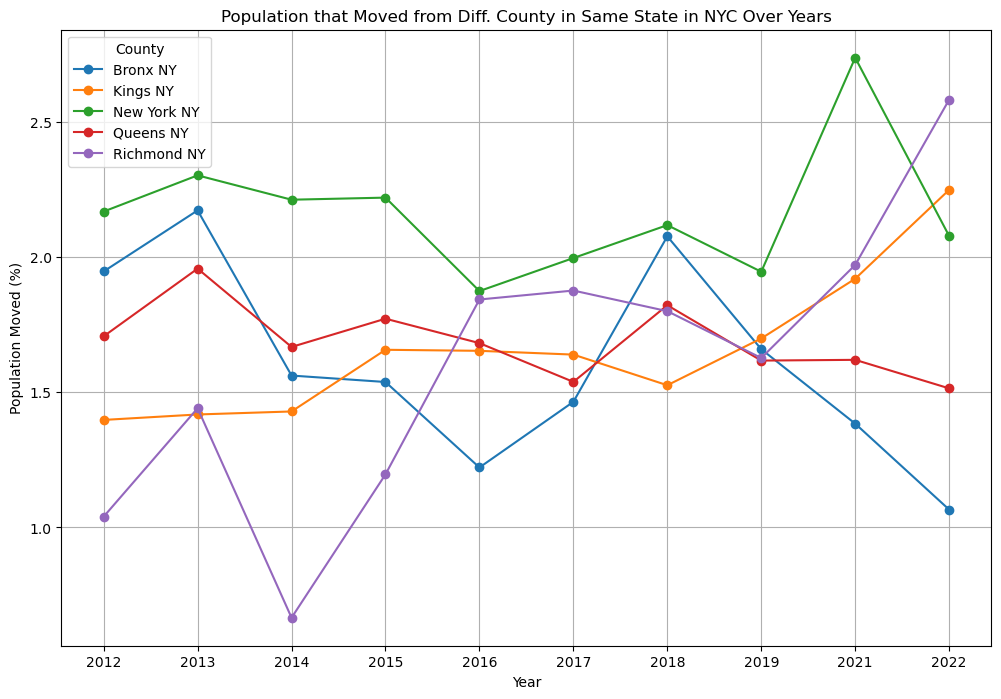

In [11]:
####################### NYC Counties Percent plotting #########################
# Initialize an empty DataFrame
NYC_percent_df = pd.DataFrame()

# Iterate over each year and corresponding Series
for year, series in NYC_Counties_df.items():
    # Convert each Series to a DataFrame, add 'Year' column
    NYC_df = series.to_frame(name="Percentage_Moved")
    NYC_df['Year'] = year
    
    # Append to the main DataFrame
    NYC_percent_df = pd.concat([NYC_percent_df, NYC_df])

# Reset the index to ensure 'Year' is a column and the counties are also treated as columns
NYC_percent_df.reset_index(inplace=True)

# Reshape the DataFrame using pivot
NYC_percent_df_pivot = NYC_percent_df.pivot(index='Year', columns='index', values='Percentage_Moved')

# Exclude any columns that might have 'Year' in them (if necessary)
if 'Year' in NYC_percent_df_pivot.columns:
    NYC_percent_df_pivot = NYC_percent_df_pivot.drop(columns=['Year'])

# Plotting each county against Year
plt.figure(figsize=(12, 8))
for county in NYC_percent_df_pivot.columns:
    plt.plot(NYC_percent_df_pivot.index, NYC_percent_df_pivot[county], marker='o', linestyle='-', label=county)

plt.xlabel('Year')
plt.ylabel('Population Moved (%)')
plt.title('Population in NYC that Moved from Diff. County in NY Over Years')
plt.legend(title='County', loc='best')
plt.grid(True)
plt.show()


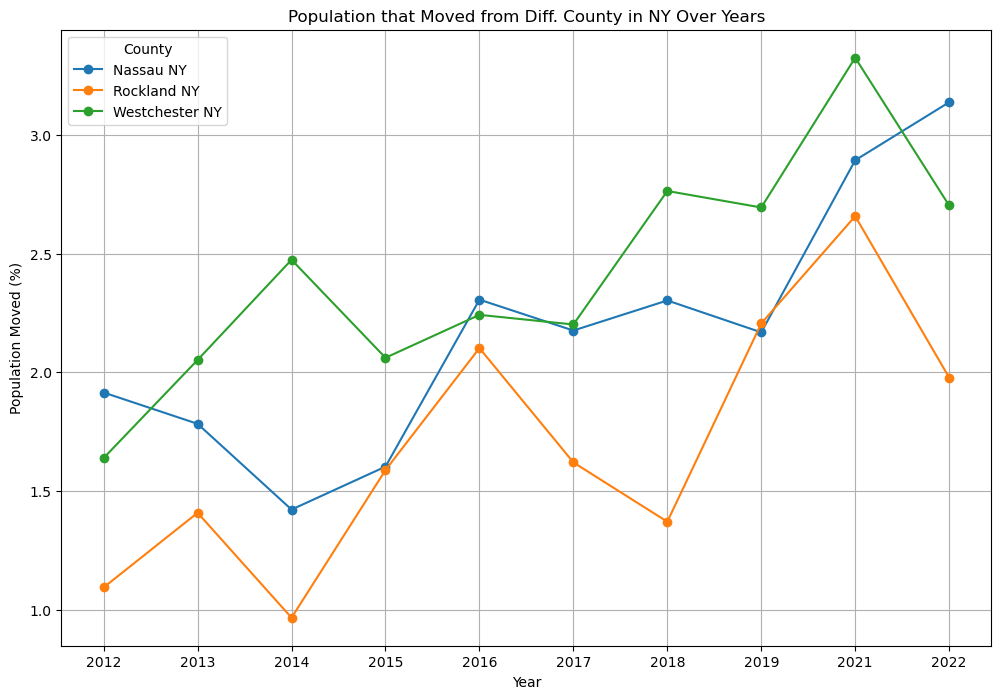

In [12]:
####################### NY Surrounding Counties Percent Plotting ############################
# Initialize an empty DataFrame
NY_percent_df = pd.DataFrame()

#Iterate over each year and corresponding Series
for year, series in surrounding_NY_df.items():
    #Convert each Series to a DataFrame, add 'Year' column
    NY_df = series.to_frame(name="Percentage_Moved")
    NY_df['Year'] = year

    #Append to the main DataFrame
    NY_percent_df = pd.concat([NY_percent_df, NY_df])

#Reset the index to ensure 'Year' is a column and the counties are also treated as columns
NY_percent_df.reset_index(inplace=True)

#Reshape the Dataframe using pivot
NY_percent_df_pivot = NY_percent_df.pivot(index='Year', columns ='index', values='Percentage_Moved')

#Exclude 'Year' in column
if 'Year' in NY_percent_df_pivot.columns:
    NY_percent_df_pivot = NY_percent_df_pivot.drop(columns=['Year'])

#Plotting each county aganist Year
plt.figure(figsize=(12,8))
for county in NY_percent_df_pivot.columns:
    plt.plot(NY_percent_df_pivot.index, NY_percent_df_pivot[county], marker='o', linestyle='-', label=county)

plt.xlabel('Year')
plt.ylabel('Population Moved (%)')
plt.title('Population outside NYC that Moved from Diff. County in NY Over Years')
plt.legend(title='County', loc='best')
plt.grid(True)
plt.show()



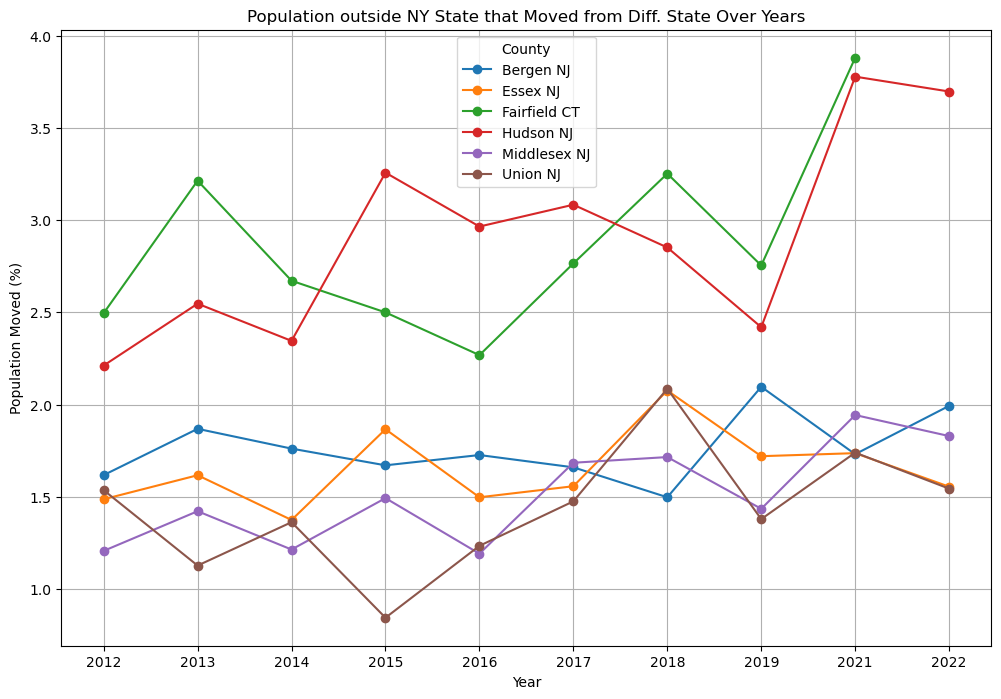

In [15]:
######################### Surrounding Counties Percent Plotting ###############################
#Initialize an empty DataFrame
surr_percent_df = pd.DataFrame()

#Iterate over each year and corresponding Series 
for year, series in surrounding_st_df.items():
    surr_st_df = series.to_frame(name= "Percentage_Moved")
    surr_st_df['Year'] = year

    #Append to the main DataFrame
    surr_percent_df = pd.concat([surr_percent_df, surr_st_df])

# Reset the index to ensure 'Year' is a column and the countries are also treated as columns
surr_percent_df.reset_index(inplace=True)

#Reshape the DataFrame using pivot
surr_percent_df_pivot = surr_percent_df.pivot(index='Year', columns='index', values='Percentage_Moved')

List_Columns = ['Bergen NJ', 'Essex NJ', 'Fairfield CT', 'Hudson NJ', 'Middlesex NJ', 'Union NJ', 'Year']
#Declering Percentage_Moved values as numeric
for col in List_Columns:
    surr_percent_df_pivot[col] = pd.to_numeric(surr_percent_df_pivot[col], errors='coerce')

# Exlude 'Year' column 
if 'Year' in surr_percent_df_pivot.columns:
    surr_percent_df_pivot = surr_percent_df_pivot.drop(columns=['Year'])

#Exclude if 'Percentage_Moved' is zero
surr_percent_df_pivot = surr_percent_df_pivot.loc[:, (surr_percent_df_pivot !=0.000000).any(axis=0)]

#Plotting each county aganist Year
plt.figure(figsize=(12,8))
for county in surr_percent_df_pivot.columns:
    plt.plot(surr_percent_df_pivot.index, surr_percent_df_pivot[county], marker='o', linestyle='-', label=county)

plt.xlabel('Year')
plt.ylabel('Population Moved (%)')
plt.title('Population outside NY State that Moved from Diff. State Over Years')
plt.legend(title='County', loc='best')
plt.grid(True)
plt.show()
